In [4]:
import sys
sys.path.append('../')
from graph_max_shift import *
import matplotlib.pyplot as plt
import pickle

In [10]:
# for plottin
from matplotlib.colors import ListedColormap
colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB", "tab:pink",
         '#f8bbc1', '#b9e6f6', '#ffebbb', '#d9eec3', '#ded3f7', '#f4c9e7'
         ]
cmap = ListedColormap(colors)

plt.rc('font',  size = 14)

In the first set of plots we fix the dataset and vary r. For simplicity, we let h=r. We use a modified version of the bimodal dataset (with smaller separation between the components and non equal weights, to increase the difficulity of the clustering task).

In [6]:
n = 10000
weights = [1/4, 3/4]
means = [np.array([.8,-.8]), np.array([-.8,.8])]
covs = [np.array([[(2/3)**2,(7/10)*(2/3)**2], [(7/10)*(2/3)**2, (2/3)**2]]), np.array([[(2/3)**2,0], [0, (2/3)**2]])]

bimodal = GaussianMixture(weights, means, covs)
modes, saddle, boundaries = ground_truth_clustering(bimodal)

In [8]:
# data = bimodal.sample(n)

with open('data/bimodal_hyperparameter.pkl', 'rb') as file:
    data, boundaries = pickle.load(file)
graph = GeometricGraph(data, 1, batch_size=10000)
maxshift = GraphMaxShift(graph)

100%|██████████| 2/2 [00:03<00:00,  1.66s/it]


In [22]:
# with open('data/bimodal_hyperparameter.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, boundaries), file)

100%|██████████| 10000/10000 [00:04<00:00, 2232.24it/s]


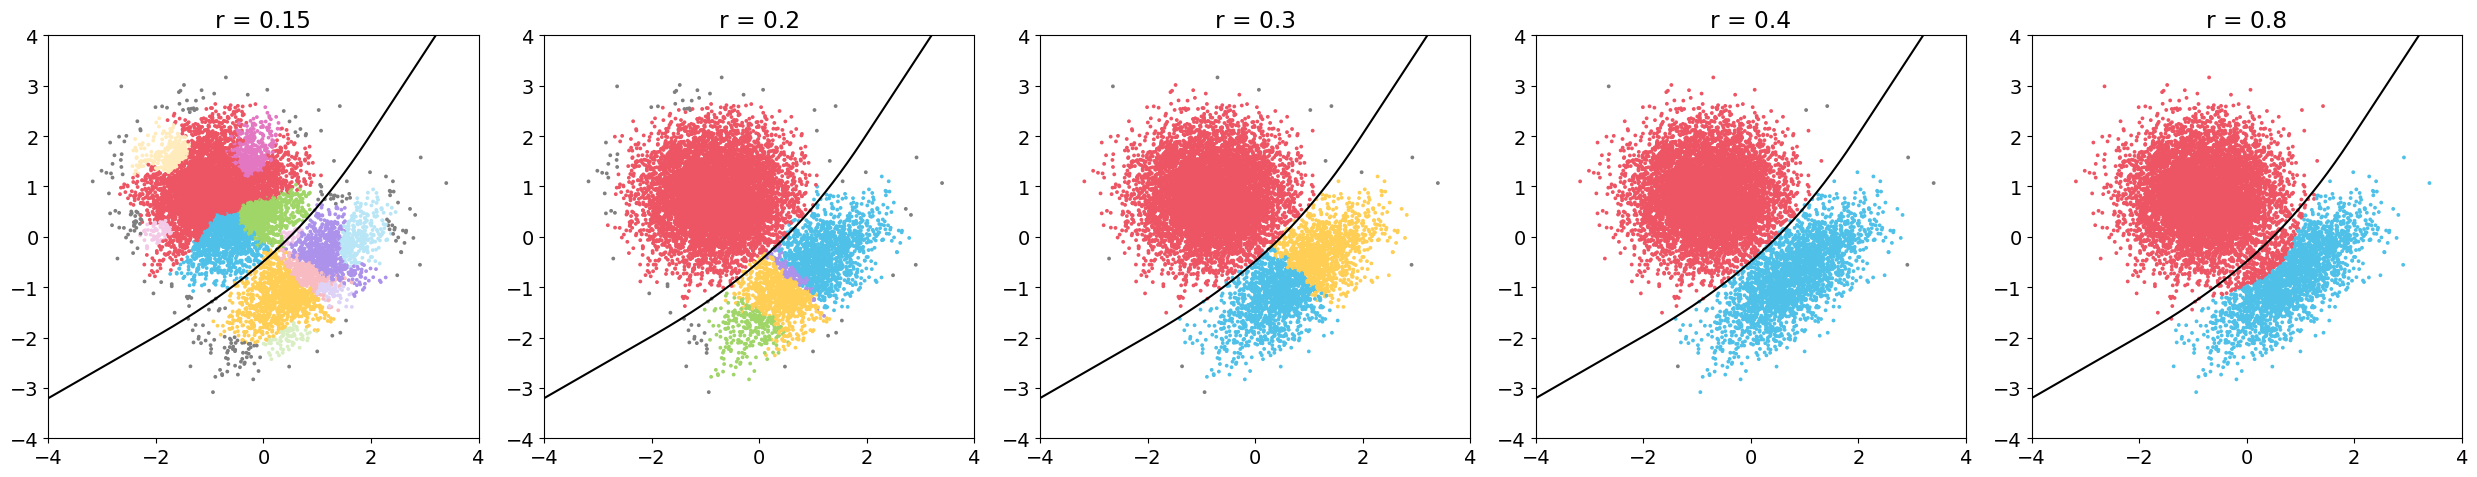

In [10]:
fig, axs = plt.subplots(1,5,figsize = [25,5])
for i,r in enumerate([.15,.2,.3,.4,.8]):
    h = r
    maxshift.cluster(h,r)
    clusters = maxshift.reindex_clusters(25)
    axs[i].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 13)
    axs[i].set_title('r = ' + str(r))
for i in range(5):
    for path in boundaries :
        axs[i].plot(path[:,0], path[:,1], color = 'black')
    axs[i].set_xlim(-4,4)
    axs[i].set_ylim(-4,4)
plt.tight_layout()
plt.savefig('plots/hyperparameter_tuning.png', format='png', dpi=300, bbox_inches='tight')

Below, we include some other variations on the hyperparameters.

First, vary both h and r

In [11]:
fig, axs = plt.subplots(4,4,figsize = [20,20])
for i,r in enumerate([.2,.4,.8, 1]):
    for j, h in enumerate([.01, .05, .1, 1]): #ay want to change more drastcially 
        maxshift.cluster(h,r)
        clusters = maxshift.reindex_clusters(25)
        axs[i,j].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 13)
        axs[i,j].set_title('h = ' + str(h) + ', r = ' + str(r))
for i in range(4):
    for j in range(4):
        for path in boundaries :
            axs[i,j].plot(path[:,0], path[:,1], color = 'black')
            axs[i,j].set_xlim(-4,4)
            axs[i,j].set_ylim(-4,4)
plt.tight_layout()
plt.savefig('plots/hyperparameter_tuning_b.png', format='png', dpi=300, bbox_inches='tight')

Also vary n and r

In [ ]:
fig, axs = plt.subplots(4,5, figsize = [25,20])
for i, n in enumerate([500, 5000, 10000, 50000]):
    data = bimodal.sample(n)
    
    # save data for reproducibility
    with open('data/bimodal_hyperparameter_' + str(n) +'.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
        pickle.dump((data, boundaries), file)
    graph = GeometricGraph(data, 1, batch_size=10000)
    maxshift = GraphMaxShift(graph)
        
    for j, r in enumerate([.15,.2,.3,.4,.8]):
        h = r
        maxshift.cluster(h,r)
        clusters = maxshift.reindex_clusters(25)
        axs[i,j].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 13)
        axs[i,j].set_title('n = ' + str(n) + ', r = ' + str(r))
        
for i in range(3):
    for j in range(5):
        for path in boundaries :
            axs[i,j].plot(path[:,0], path[:,1], color = 'black')
        axs[i,j].set_xlim(-4,4)
        axs[i,j].set_ylim(-4,4)
plt.tight_layout()
plt.savefig('plots/hyperparameter_tuning_c.png', format='png', dpi=300, bbox_inches='tight')


    
    
    
    

 17%|█▋        | 1/6 [00:51<04:18, 51.65s/it]
